In [ ]:
# !pip install fbprophet

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [2]:
df=pd.read_csv('/content/drive/My Drive/Python/OilProduction/37145_Prod_noNAN.csv',
               usecols=['FirstOfMonth','OilProduced'],
               )
df=df.rename(columns={"FirstOfMonth": "ds", "OilProduced": "y"})
df.head()

,ds,y
0,10/1/2013,8339
1,11/1/2013,9566
2,12/1/2013,6654
3,1/1/2014,4951
4,2/1/2014,3849


In [16]:
m = Prophet(changepoint_prior_scale = 1,
            seasonality_prior_scale = 0.01)
m.fit(df)
future = m.make_future_dataframe(periods=36, freq='MS')
# future.tail()
forecast = m.predict(future)
forecast.tail
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<bound method NDFrame.tail of             ds        trend  ...  multiplicative_terms_upper         yhat
0   2013-10-01  9145.565451  ...                         0.0  9052.029996
1   2013-11-01  7910.562698  ...                         0.0  8136.705981
2   2013-12-01  6715.398742  ...                         0.0  6729.343057
3   2014-01-01  5480.395989  ...                         0.0  5452.002187
4   2014-02-01  4245.448940  ...                         0.0  4164.886871
..         ...          ...  ...                         ...          ...
114 2023-04-01   165.779894  ...                         0.0   187.538093
115 2023-05-01   164.622191  ...                         0.0    72.011888
116 2023-06-01   163.425898  ...                         0.0   161.506370
117 2023-07-01   162.268195  ...                         0.0   149.946083
118 2023-08-01   161.071902  ...                         0.0   180.164582

[119 rows x 16 columns]>

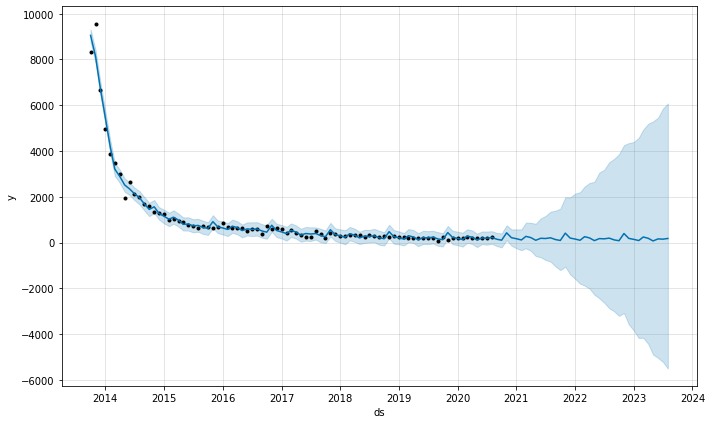

In [13]:
fig1 = m.plot(forecast)

In [18]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-10-01,9145.565451,8780.784396,9357.539549,9145.565451,9145.565451,-93.535455,-93.535455,-93.535455,-93.535455,-93.535455,-93.535455,0.0,0.0,0.0,9052.029996
1,2013-11-01,7910.562698,7840.696508,8413.573938,7910.562698,7910.562698,226.143283,226.143283,226.143283,226.143283,226.143283,226.143283,0.0,0.0,0.0,8136.705981
2,2013-12-01,6715.398742,6437.265059,7031.400561,6715.398742,6715.398742,13.944314,13.944314,13.944314,13.944314,13.944314,13.944314,0.0,0.0,0.0,6729.343057
3,2014-01-01,5480.395989,5158.234506,5747.748298,5480.395989,5480.395989,-28.393801,-28.393801,-28.393801,-28.393801,-28.393801,-28.393801,0.0,0.0,0.0,5452.002187
4,2014-02-01,4245.448940,3877.239952,4439.107742,4245.448940,4245.448940,-80.562070,-80.562070,-80.562070,-80.562070,-80.562070,-80.562070,0.0,0.0,0.0,4164.886871


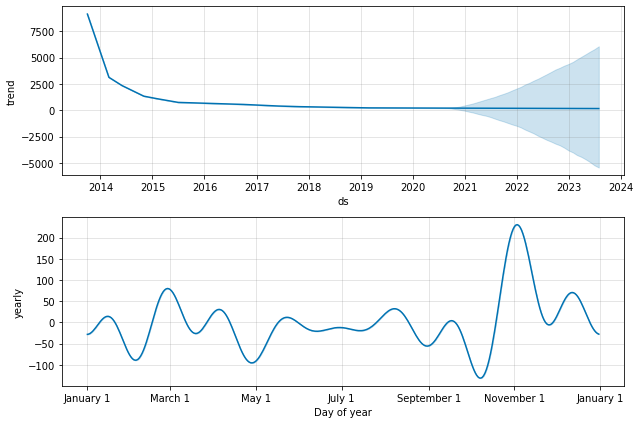

In [14]:
fig2 = m.plot_components(forecast)
